# Best Neighborhood For a Fugitive

### Introduction
This notebook will analyze data on Pittsburgh Speed-Humps, Police Arrest Data, and Pittsburgh trees to determine which is the best neighborhood of the city to be a fugitive on the run in.

We decided that our metric for "Best Neighborhood in Pittsburgh" would be the best area for a criminal to escape the law. Why did we choose this as our metric? Well I can assure you that we are definitely not plotting anything sinister, or are we? In reality, we decided on the best neighborhood for a fugitive because the idea was interesting and funny. We did not have other ideas for metrics, the fugitive metric was our first real idea and we thought it was funny so we ran with it.

### The Metric
For a neighborhood to be considered the best, it needs to pass the criteria of our metric. The best neighborhood will have a low number of speed-humps, allowing the fugitive to make a speedy getaway with few obstacles on the road. The best neighborhood will also have the lowest police presence. This will be measure as neighborhoods with minimal history of violence and police arrests. Lastly, the best neighborhood has to have the most and hte largest trees. The fugitive needs to use these trees to hide from the police to evade capture.

## Dataset 1: Pittsburgh Speed Humps

In [7]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/37b2ac41-ae8e-4de1-8405-157e05dc3640", index_col = "neighborhood")

First I imported the data on Speed-Humps in Pittsburgh neighborhoods. I plan to analyze the number of speed humps in different neighborhoods. A neihgborhood will be considered better if there are fewer speed-humps because a fugitive would be able to make a faster getaway with less obstacles on the road.

![bumps](https://media.giphy.com/media/2iIByARQYitri/giphy.gif)

In [10]:
data.head(10)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,
Squirrel Hill South,430808404,1,4337.0,Saline St,9257,Asphalt,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
Squirrel Hill South,1520886592,2,NaN,Summerset Dr,15346,NaN,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
North Oakland,858537521,3,511.0,Gold Way,1755,Asphalt,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
North Oakland,297775878,4,547.0,Gold Way,1755,Asphalt,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
North Oakland,1061197751,5,593.0,Gold Way,1755,Asphalt,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
Squirrel Hill South,25169591,10,4224.0,Saline St,4673,Asphalt,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
Brookline,2056880845,11,2146.0,Jacob St,17688,Asphalt,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
Brookline,1735565853,12,2082.0,Jacob St,17688,Asphalt,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
Brookline,857069875,13,2013.0,Jacob St,17688,Asphalt,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401


The data is now grouped by the neighborhood and the count of each column is displayed. Here we can see the number of speed humps per neighborhood in the dataset.

In [11]:
hood = data.groupby("neighborhood").count()
hood

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,
Bloomfield,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Brookline,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Carrick,9,9,9,9,9,8,9,9,9,9,9,9,9,9,9
Central Oakland,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Garfield,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Highland Park,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Homewood South,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Mount Washington,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
North Oakland,6,6,5,6,6,5,6,6,6,6,6,6,6,6,6


I grouped the data by niehgborhoods. This makes the dataset easier to read and gives combined stats for each neighborhood rather than stats for each individual speed-hump.

In [12]:
hood['hump_id'].sum()

79

There are 79 total speed humps accounted for in the dataset

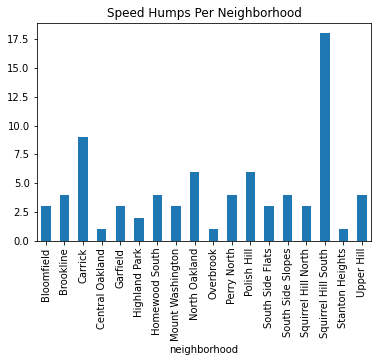

In [13]:
hood['hump_id'].plot.bar(rot = 90, title = 'Speed Humps Per Neighborhood')

The bar chart visualizes the number of speed humps in each neighborhood recorded in the dataset.

## Driving Through Squirrel Hill South be like:


![bumpyride](https://media.giphy.com/media/qBEZa7Fq1dVVC/giphy.gif)


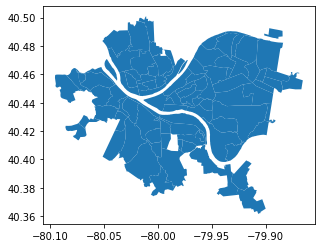

In [14]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

Here I imported the shape file of the city of Pittsburgh and its neighborhoods. I will use this to make a visualization of the desnity of speed bumps per neighborhood.

In [15]:
humps_map = neighborhoods.merge(hood, how='left', left_on='hood', right_on='neighborhood')
humps_map.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,speed_hump_material,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1293,201,42,003,980600,1,420039806001,Block Group 1,G5030,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1294,10,42,003,261200,1,420032612001,Block Group 1,G5030,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1295,11,42,003,260900,1,420032609001,Block Group 1,G5030,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1296,7,42,003,262000,1,420032620001,Block Group 1,G5030,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1297,8,42,003,261500,1,420032615001,Block Group 1,G5030,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


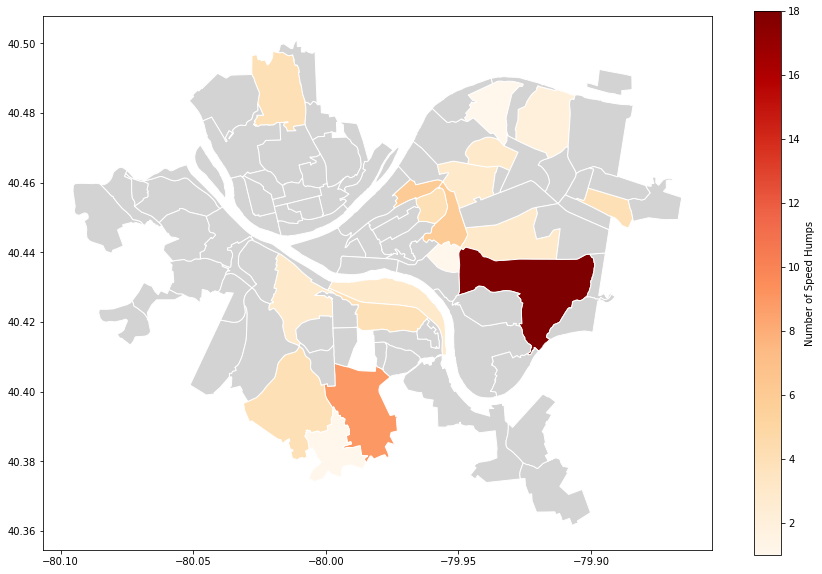

In [16]:
humps_map.plot(column = 'hump_id',
               cmap = 'OrRd',
               legend = True,edgecolor="white",
               missing_kwds={"color": "lightgrey"},
               figsize=(15, 10),
               legend_kwds={'label': "Number of Speed Humps"})
plt.style.use('ggplot')

Using geopandas we can overlay our data on the map of Pittsburgh, showing a heat map of which neihgborhoods are recorded having the most speed humps. The gray neighborhoods either have no recorded speed hump data or 0 speed humps in total.

## Conclusion

For the analysis of this dataset, the better neighborhoods have the least amount of speed-humps. Many of the Pittsburgh neighborhoods were not included in the dataset. Because I do not know which neighborhoods legitimately have 0 speed-humps vs neighborhoods that data was not recorded for, I will count the neighborhoods with only 1 recorded speed-hump as the best. This leaves the best neighborhood in terms of speed-humps a tie. The best neighborhoods are Central Oakland, Overbrook and Stanton Heights.

## Dataset 2: Police Blotter Archived Data
For my visualization, I selected the Police Blotter Archived dataset. I chose this dataset over the current 30-day dataset as the archived data would be better to analyze trends over months and even years. This dataset contains information about where police are dispatched to and the offenses that have occurred. In order to select and determine the best neighborhood from this data, it will be the one with the least police presence and the violence of the offenses will be taken into account as well.

In [17]:
# import necessary libraries and data
import numpy as np

police_blotter_data = pd.read_csv('https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e',index_col="INCIDENTTIME", parse_dates = True)

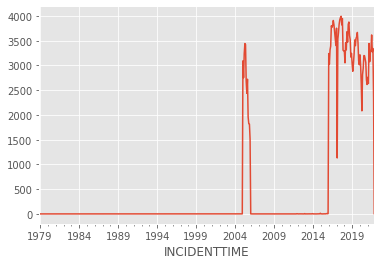

In [18]:
# first experimentation, graph by time
police_blotter_data.resample("M").size().plot()

## Initial Impressions of the Data
My initial impressions of the data showed that the first collection point started in 1979. However, it flatlined and peaked again around 2005 then dipped again until 2016. It was here that I had a hunch that the project was halted and then began again. Because of the lack of data collection consistency, I decided to only analyze the data from 2016 - Current. Because of this, the next step would be to filter by date from 2016 - 2021. I also decided to get rid of any entries that had incomplete data such as an empty neighborhood value, offenses, etc.

In [19]:
# code to only examine from 2016 - 2021 and drop any N/A categories
police_blotter_wanted = police_blotter_data.loc['2016':'2021']
neighborhood_filter1 = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] != "Outside City"
neighborhood_filter2 = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] != "Outside County"
neighborhood_filter3 = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] != "Outside State"
police_blotter_wanted = police_blotter_wanted.where(neighborhood_filter1)
police_blotter_wanted = police_blotter_wanted.where(neighborhood_filter2)
police_blotter_wanted = police_blotter_wanted.where(neighborhood_filter3)
police_blotter_wanted = police_blotter_wanted.dropna()

police_blotter_wanted

,PK,CCR,HIERARCHY,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTTIME,,,,,,,,,,,,,,
2016-01-01 00:00:00,2802309.0,16000001.0,10.0,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
2016-01-01 00:01:00,2803174.0,16004547.0,11.0,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2016-01-01 00:10:00,2801809.0,16000367.0,4.0,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
2016-01-01 00:15:00,2802315.0,16000035.0,10.0,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
2016-01-01 00:16:00,2802312.0,16000024.0,4.0,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22 08:20:00,3269267.0,21110248.0,7.0,"1200 Block Veto ST Pittsburgh, PA 15212",N,Central North Side,1,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,2206.0,1.0,1.0,-80.009328,40.455638
2021-06-23 17:15:00,3269274.0,21111252.0,14.0,"400 Block Arabella ST Pittsburgh, PA 15210",N,Knoxville,3,CRIMINAL MISCHIEF (AUTO),3304 Criminal Mischief.,3001.0,3.0,5.0,-79.995120,40.412844
2021-02-19 16:12:00,3269323.0,21028869.0,5.0,"3200 Block Niagara ST Pittsburgh, PA 15213",Y,South Oakland,4,BURGLARY/FORCE ENT/RES,2706 Terroristic Threats. / 3502 Burglary. / 4...,409.0,3.0,3.0,-79.960431,40.433927


## First Manipulation
After obtaining the data I wanted to work with, I decided on a couple of things I could do to manipulate the data and make it easier to further analyze. These goals included:

- Analyze trends over the years of each neighborhood
- Translate data to quantitative values
- Create a metric where both severity of crime and frequency of crimes committed is accounted for

In [20]:
police_blotter_data['INCIDENTNEIGHBORHOOD'].value_counts()


South Side Flats             15204
Central Business District    13620
Carrick                       9237
Bloomfield                    7095
Shadyside                     6793
                             ...  
Chartiers City                 249
Outside State                  246
Outside County                 179
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 81
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

In [21]:
police_blotter_data['INCIDENTHIERARCHYDESC'].value_counts()

THEFT FROM AUTO                               14141
THEFT/ALL OTHERS                              12272
SIMPLE ASSAULT/INJURY                         10218
CRIMINAL MISCHIEF (AUTO)                       9514
CRIMINAL MISCHIEF                              7041
                                              ...  
STORE/CONSUM/SALE ALCO BEV UNLICENSED PREM        1
UNLAW LISTEN DELIB. OF JURY                       1
ARSON (OTHER STRUCTURE-OCCUP)                     1
REP LIQ DEAL THAT MINOR IS AGE                    1
MISAPP/ENTRUST PROP INC GOV/IN                    1
Name: INCIDENTHIERARCHYDESC, Length: 308, dtype: int64

## Analysis 1
From obtaining the counts of incidents in each neighborhood and the number of types of incident hierarchies description, there would be too many different types to assign a value to. Therefore, I decided to settle on assigning numerical values to hierarchy. Hierarchy according to the data dictionary (and through further research), meant that each incident that the police responded to is assigned a value that is the highest "crime" even if multiple offenses were committed. However with 30+ different values, I decided to group certain hierachies together using information obtained from this [link](https://www.ucr.pa.gov/PAUCRSPUBLIC/Publication/Active/2018%20Annual%20Uniform%20Crime.pd) and assign each group certain score values.)

In [22]:
violence_score_tiers = [
    (police_blotter_wanted["HIERARCHY"] <= 4),
    (police_blotter_wanted["HIERARCHY"] > 4) & (police_blotter_wanted["HIERARCHY"] <= 9),
    (police_blotter_wanted["HIERARCHY"] == 15),
    (police_blotter_wanted["HIERARCHY"] >= 10) & (police_blotter_wanted["HIERARCHY"] <= 14),
    (police_blotter_wanted["HIERARCHY"] == 19),
    (police_blotter_wanted["HIERARCHY"] >= 16) & (police_blotter_wanted["HIERARCHY"] <= 18),
    (police_blotter_wanted["HIERARCHY"] >= 21) & (police_blotter_wanted["HIERARCHY"] <= 23),
    (police_blotter_wanted["HIERARCHY"] >= 24) & (police_blotter_wanted["HIERARCHY"] <= 26),
    (police_blotter_wanted["HIERARCHY"] == 20),
    (police_blotter_wanted["HIERARCHY"] >= 27)
]

violence_score_values = [15, 12, 12, 8, 8, 10, 10, 6, 6, 3]

police_blotter_wanted["Violence Score"] = np.select(violence_score_tiers, violence_score_values)
police_blotter_wanted.head()

,PK,CCR,HIERARCHY,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,Violence Score
INCIDENTTIME,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2802309.0,16000001.0,10.0,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263,8
2016-01-01 00:01:00,2803174.0,16004547.0,11.0,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290,8
2016-01-01 00:10:00,2801809.0,16000367.0,4.0,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651,15
2016-01-01 00:15:00,2802315.0,16000035.0,10.0,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918,8
2016-01-01 00:16:00,2802312.0,16000024.0,4.0,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651,15


## Second Manipulation
The next step is to manipulate and use the violence score column that was just created. In order to do so, I decided to plot this data on a bar chart by taking each neighborhood and its total violence score over the course from 2016 - 2021. I also decided to take the mean of the violence score. Taking the mean eliminates the size and population of the neighborhood and indicates the sheer violence of the crime.

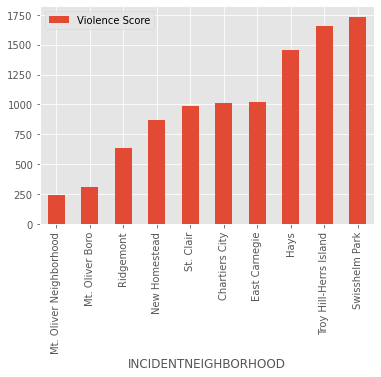

In [25]:
total_vio_score_all_years = just_vio_score_data.groupby("INCIDENTNEIGHBORHOOD").sum()
total_vio_years_srt = total_vio_score_all_years.sort_values("Violence Score")
total_vio_years_srt.head(10).plot(kind = "bar")

(8.5, 9.75)

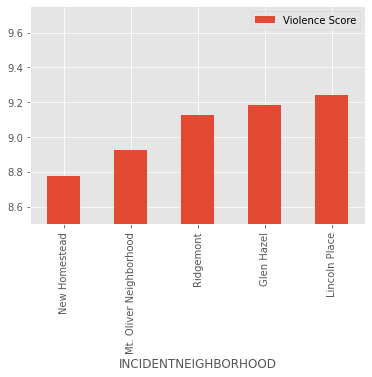

In [26]:
just_vio_score_data = police_blotter_wanted[["INCIDENTNEIGHBORHOOD","Violence Score"]]
mean_vio_data = just_vio_score_data.groupby("INCIDENTNEIGHBORHOOD")["Violence Score"].mean().sort_values()
mean_vio_data.head().plot(kind = "bar")
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(8.5, 9.75)

## Analysis 2
The next step is to find where the neighborhoods had both the least mean violence score and least total violence score. While just from a quick glance it can be noted that New Homestead, Mount Oliver, and a couple others are shared. I decided to just run a for loop and take the similarities of the lowest 20 as that resulted in a desirable number of neighborhoods.

In [27]:
i = 0
j = 0
key_neighborhood = []
for i in range(20):
    for j in range(20):
        if mean_vio_data.index[j] == total_vio_years_srt.index[i]:
            key_neighborhood.append(mean_vio_data.index[j])

for neighborhoods in key_neighborhood:
    print(neighborhoods)

Mt. Oliver Neighborhood
Mt. Oliver Boro
Ridgemont
New Homestead
East Carnegie
Mount Oliver
Glen Hazel
Fairywood


## Manipulation and Analysis 3
After obtaining the similar neighborhoods shared, I decided to plot the mean violence score of those neighborhoods over time to see if any neighborhoods were becoming more violent. However, it seems that most of them follow a cyclical pattern with sum peaking in the middle of the year while others peaking in the winter months. However, by analyzing for a decreasing violence trend, it seems that East Carnegie, Mount Oliver, and New Homestead have a decreasing mean violence trend and a sharp decrease at the moment. To further back this up I decided to graph the sum of the violence score as well over the years. Among the three neighborhoods, East Carnegie and Mount Oliver also have a sharp decreasing total violence scores.

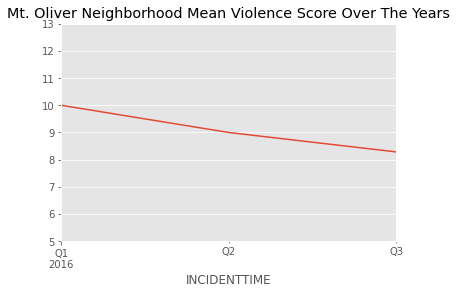

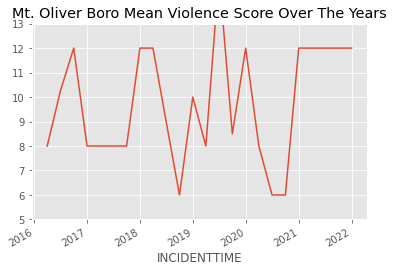

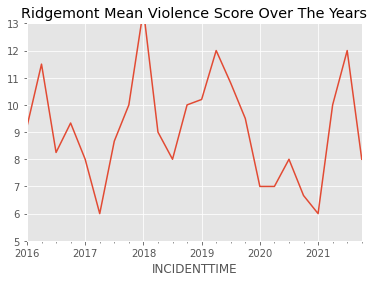

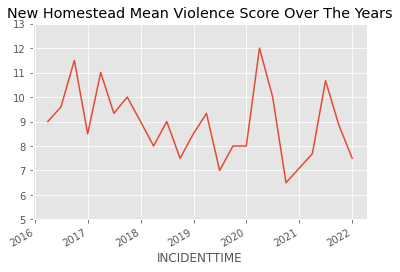

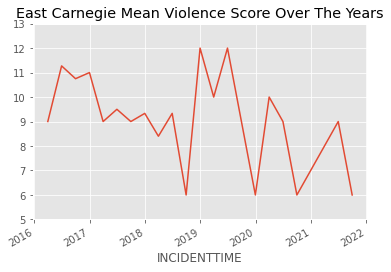

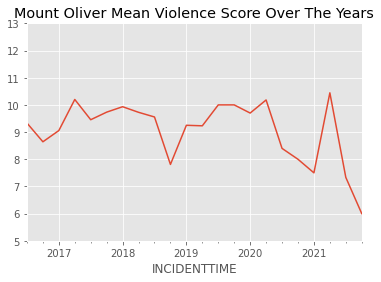

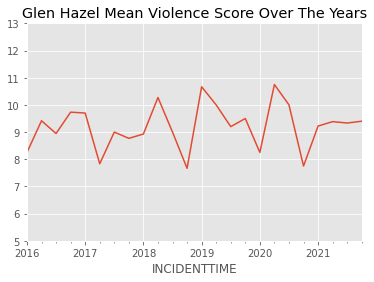

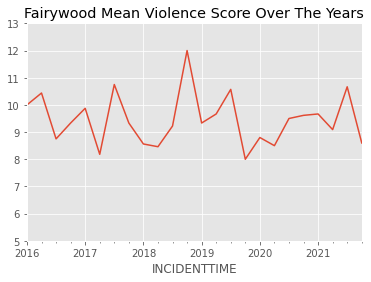

In [28]:
i = 0
for i in range(len(key_neighborhood)):
    key_neighborhood_filter = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] == key_neighborhood[i]
    # print(key_neighborhood[i])
    key_neighborhood1_data = police_blotter_wanted.where(key_neighborhood_filter)
    key_neighborhood1_data = key_neighborhood1_data.dropna()
    key_neighborhood1_data = key_neighborhood1_data.resample("Q").mean()
    key_neighborhood1_data = key_neighborhood1_data.dropna()
    plt.figure()
    key_neighborhood1_data["Violence Score"].plot()
    plt.ylim(5, 13)
    plt.title(key_neighborhood[i] + " Mean Violence Score Over The Years")

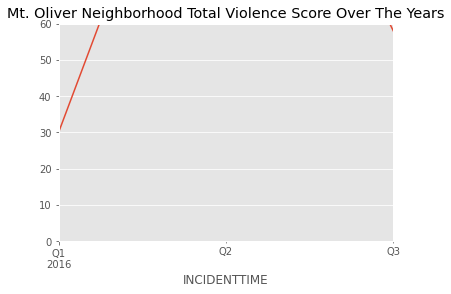

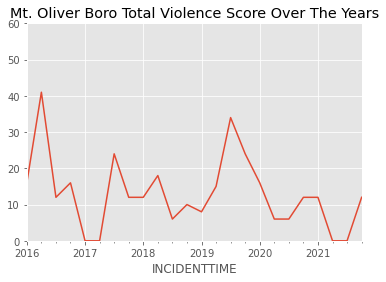

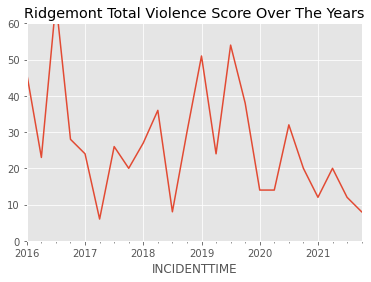

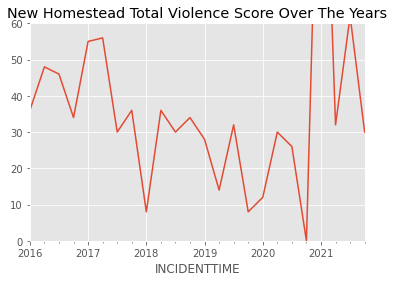

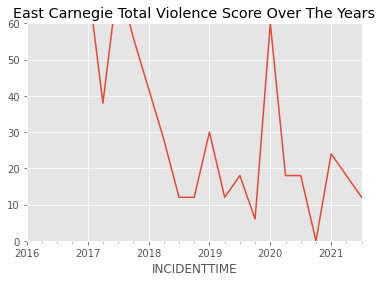

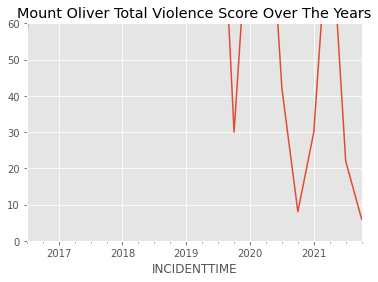

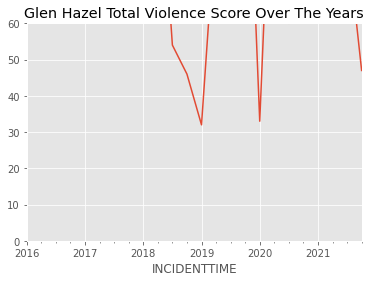

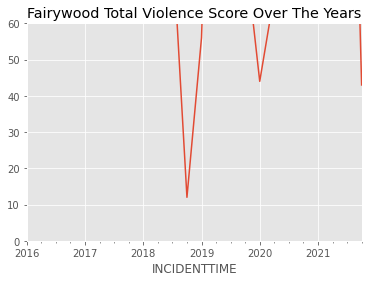

In [29]:
i = 0
for i in range(len(key_neighborhood)):
    key_neighborhood_filter = police_blotter_wanted["INCIDENTNEIGHBORHOOD"] == key_neighborhood[i]
    # print(key_neighborhood[i])
    key_neighborhood1_data = police_blotter_wanted.where(key_neighborhood_filter)
    key_neighborhood1_data = key_neighborhood1_data.dropna()
    key_neighborhood1_data = key_neighborhood1_data.resample("Q").sum()
    key_neighborhood1_data = key_neighborhood1_data.dropna()
    plt.figure()
    key_neighborhood1_data["Violence Score"].plot()
    plt.ylim(0, 60)
    plt.title(key_neighborhood[i] + " Total Violence Score Over The Years")

## Manipulation 4
For the next manipulation of the data, I decided to involve the creation of maps. But instead of of just creating one, I ended up creating 72 of them and create a gif.

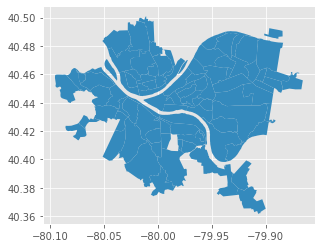

In [30]:
neighborhood_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhood_map.plot()

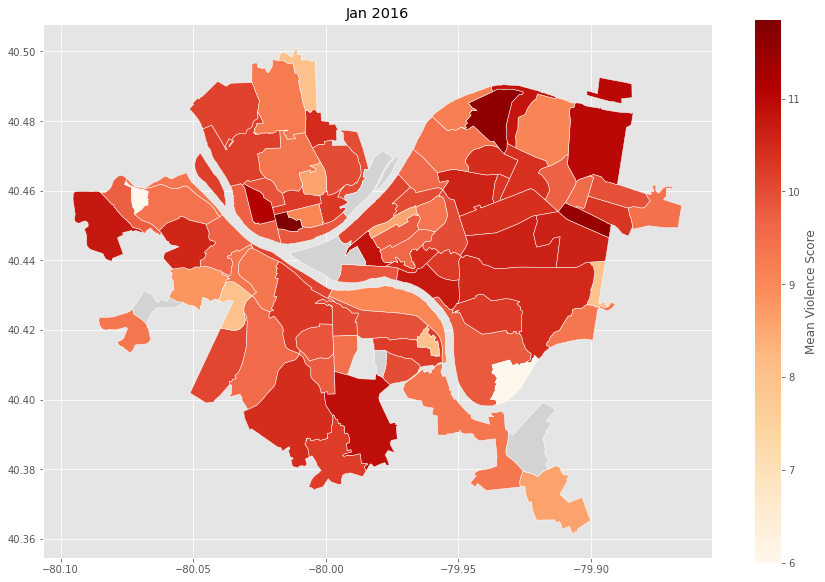

In [31]:
# isolated 2016 data and separated by month (did this another 5 times for each year and its months)
data_2016 = police_blotter_wanted.loc["2016"]
data_jan_2016 = data_2016.loc["1-1-2016":"1-31-2016"]
data_feb_2016 = data_2016.loc["2-1-2016":"2-29-2016"]
data_mar_2016 = data_2016.loc["3-1-2016":"3-31-2016"]
data_apr_2016 = data_2016.loc["4-1-2016":"4-30-2016"]
data_may_2016 = data_2016.loc["5-1-2016":"5-31-2016"]
data_jun_2016 = data_2016.loc["6-1-2016":"6-30-2016"]
data_jul_2016 = data_2016.loc["7-1-2016":"7-31-2016"]
data_aug_2016 = data_2016.loc["8-1-2016":"8-31-2016"]
data_sep_2016 = data_2016.loc["9-1-2016":"9-30-2016"]
data_oct_2016 = data_2016.loc["10-1-2016":"10-31-2016"]
data_nov_2016 = data_2016.loc["11-1-2016":"11-30-2016"]
data_dec_2016 = data_2016.loc["12-1-2016":"12-31-2016"]

# filtered and found the mean score (did this another 5 times for each year and its months)
data_jan2016_fltrd = data_jan_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_feb2016_fltrd = data_feb_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_mar2016_fltrd = data_mar_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_apr2016_fltrd = data_apr_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_may2016_fltrd = data_may_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_jun2016_fltrd = data_jun_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_jul2016_fltrd = data_jul_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_aug2016_fltrd = data_aug_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_sep2016_fltrd = data_sep_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_oct2016_fltrd = data_oct_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_nov2016_fltrd = data_nov_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]
data_dec2016_fltrd = data_dec_2016.groupby("INCIDENTNEIGHBORHOOD").mean()["Violence Score"]

# merged the map columns
avg_vio_score_jan2016 = neighborhood_map.merge(data_jan2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_feb2016 = neighborhood_map.merge(data_feb2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_mar2016 = neighborhood_map.merge(data_mar2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_apr2016 = neighborhood_map.merge(data_apr2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_may2016 = neighborhood_map.merge(data_may2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_jun2016 = neighborhood_map.merge(data_jun2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_jul2016 = neighborhood_map.merge(data_jul2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_aug2016 = neighborhood_map.merge(data_aug2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_sep2016 = neighborhood_map.merge(data_sep2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_oct2016 = neighborhood_map.merge(data_oct2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_nov2016 = neighborhood_map.merge(data_nov2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
avg_vio_score_dec2016 = neighborhood_map.merge(data_dec2016_fltrd, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

# Plotted and displayed each graph and saved as an image to then export to make a gif
avg_vio_score_jan2016.plot(column='Violence Score', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Mean Violence Score"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.title("Jan 2016")
integer_title = 1
title = str(integer_title)
plt.savefig(title)
integer_title = integer_title + 1


![maps](https://raw.githubusercontent.com/jeffzheng13/Best-Neighborhood-For-Fugitive/main/map.gif)

## Analysis 4
The map GIF further solidifies that from month to month the mean violence score varies and fluctuates wildly. Furthermore, it does not offer a clear winner by using a quick glance.

## Conclusion
As a conclusion, using the bar and line graphs, East Carnegie and Mount Oliver seem to fall in line as the best neighborhoods to hide in. With decreasing violence scores all around, the lesser police presence makes for a less chance getting noticed incidentally. However, more in-depth analysis could be done to pinpoint exactly which neighborhood would be the best to reside in during the fluctuations of months. However, during this analysis, more factors would also need to be considered such as the risk inherent with traveling across neighborhoods and speed bumps would need to be taken into account as well.


## Dataset 3: City of Pittsburgh Trees
### Introduction
One of the most important things to consider when running from the cops is where to hide, and whether or not you will have any cover. That's why I decided to look at the quantity and quality of trees in each Pittsburgh neighborhood, as trees provide lots of cover and can be useful when looking for a hiding spot.

I also considered looking at vacant residences in Pittsburgh, but I eventually decided on this dataset instead because it was more complete and easier to work with. Plus, I like nature.

In [32]:
#import the dataset
trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
trees.head(10)

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
5,1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45.0,18.0,35.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477496,-79.924568
6,239290336,5503,BRYANT ST,Dogwood: Corneliancherry,Cornus mas,8.0,4.0,99.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478403,-79.925985
7,1233652274,1207,KING AVE,Maple: Norway,Acer platanoides,27.0,10.0,30.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478404,-79.926126
8,1477030894,1201,KING AVE,Maple: Norway,Acer platanoides,35.0,12.0,3.0,3.0,Well or Pit,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478314,-79.926161
9,1484901843,1456,WOODBINE ST,Maple: Norway,Acer platanoides,NaN,NaN,NaN,NaN,Open or Unrestricted,...,Stanton Heights,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,40.485240,-79.936390


## The Metrics
As you can tell, this dataset includes a lot of information on each of the trees in the City of Pittsburgh. The main things I wanted to focus on, however, is the neighborhoods of the trees (and how many trees there are in each), and the widths of the trees, as the wider the tree is the easier it is to hide behind.

Looking at the table above, you can see that some of the data includes stumps, and some of the widths and heights are either 0 or not included in the data. You can't hide from the police behind a stump, nor can you hide behind a tree that's 0 or NaN units wide, so I needed to use a query mask to filter out those faux trees:

In [33]:
stump_mask = trees["common_name"] != "Stump"
width_mask = trees["width"] > 0
height_mask = trees["height"] > 0
real_trees = trees[stump_mask & width_mask & height_mask]
real_trees.head(10)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
5,1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45.0,18.0,35.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477496,-79.924568
6,239290336,5503,BRYANT ST,Dogwood: Corneliancherry,Cornus mas,8.0,4.0,99.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478403,-79.925985
7,1233652274,1207,KING AVE,Maple: Norway,Acer platanoides,27.0,10.0,30.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478404,-79.926126
8,1477030894,1201,KING AVE,Maple: Norway,Acer platanoides,35.0,12.0,3.0,3.0,Well or Pit,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478314,-79.926161
10,998993932,3233,THAYER ST,Honeylocust: Thornless,Gleditsia triacanthos inermis,48.0,20.0,99.0,99.0,Open or Restricted,...,Sheraden,2.0,20.0,4.200320e+10,5.0,20.0,6.0,1-16,40.453213,-80.067245
11,1870646392,1427,ISOLINE ST,Oak: Northern Red,Quercus rubra,65.0,20.0,99.0,99.0,Open or Unrestricted,...,Chartiers City,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-16,40.455997,-80.070408
12,829500067,1400,EVANSTON ST,Maple: Norway,Acer platanoides,22.0,12.0,99.0,99.0,Open or Unrestricted,...,Sheraden,2.0,20.0,4.200320e+10,5.0,20.0,6.0,1-16,40.453446,-80.070094


I also wanted to trim the data down to just the metrics I'm using in my analysis, so I created a new DataFrame from the one above that includes just the number of trees in each neighborhood, and the average width of those trees:

In [53]:
num_trees = pd.DataFrame(real_trees.groupby("neighborhood").id.count()).rename(columns = {"id":"num"})
tree_widths = pd.DataFrame(real_trees.groupby("neighborhood").width.mean())
tree_data = num_trees.merge(tree_widths, on = "neighborhood")
tree_data.head(10)

,num,width
neighborhood,,
Allegheny Center,19,13.368421
Allegheny West,228,8.750000
Allentown,56,9.375000
Arlington,78,6.794872
Arlington Heights,3,19.000000
Banksville,412,8.992718
Bedford Dwellings,167,7.005988
Beechview,518,8.281853
Beltzhoover,101,8.871287


Now that we have an actual, useful dataset, we can start to analyze the data.

## The Best Neighborhood
First, let's look at the neighborhoods with the most trees in them. Here's a list of the top 10:

In [35]:
num_sorted = tree_data.sort_values(by = "num", ascending = False)
num_sorted.head(10)

,num,width
neighborhood,,
Squirrel Hill South,2354,9.657179
Squirrel Hill North,1571,12.919796
South Side Flats,1418,6.872355
Shadyside,1272,9.110063
East Liberty,1184,7.297297
Bloomfield,1116,8.310932
Highland Park,1067,9.686036
Point Breeze,946,10.375264
Central Business District,872,10.944954


And here's the top 25 in bar graph form:

Text(0, 0.5, 'Number of Trees')

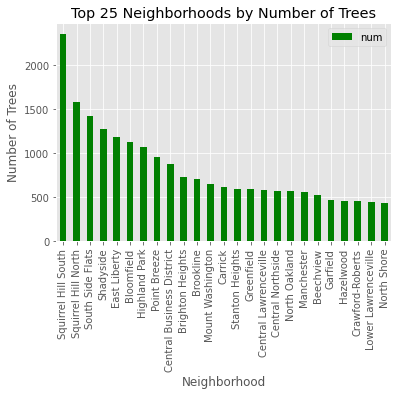

In [36]:
num_plot = num_sorted.head(25).plot(kind = "bar", y = "num", title = "Top 25 Neighborhoods by Number of Trees", color = "green")
num_plot.set_xlabel("Neighborhood")
num_plot.set_ylabel("Number of Trees")

This is nice, but this is only 25 neighborhoods. In order to view all of the neighborhoods, I decided to utilize geopandas and make a map of the number of trees in each neighborhood:

In [37]:
#import map data
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
tree_map = neighborhoods.merge(tree_data, how = "left", left_on = "hood", right_on = "neighborhood")

Text(0.5, 1.0, 'Number of Trees')

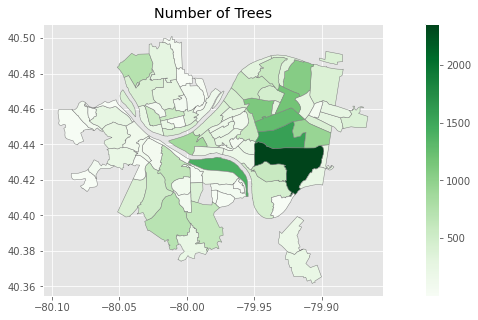

In [38]:
tree_map.plot(column='num',
               cmap='Greens',
               edgecolor="gray",
               legend=True,
               figsize=(15, 5),
               )
plt.title("Number of Trees")

So Squirrel Hill is a clear outlier when it comes to the number of trees in each neighborhood, but what about the width of the trees? Here's a list of the top 10 neighborhoods bby average width of trees:

In [39]:
width_sorted = tree_data.sort_values(by = "width", ascending = False)
width_sorted.head(10)

,num,width
neighborhood,,
East Carnegie,4,20.000000
Arlington Heights,3,19.000000
Fineview,76,14.513158
St. Clair,11,13.727273
Allegheny Center,19,13.368421
Squirrel Hill North,1571,12.919796
Sheraden,259,12.845560
Fairywood,18,12.777778
Perry South,277,11.902527


And another bar graph:

Text(0, 0.5, 'Average Width of Trees')

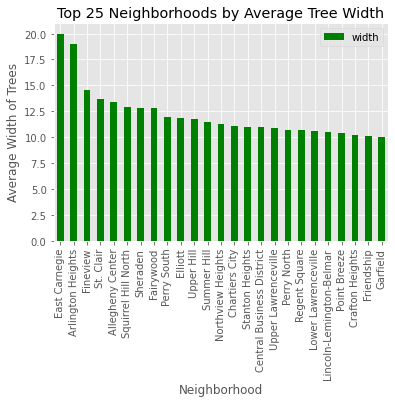

In [40]:
width_plot = width_sorted.head(25).plot(kind = "bar", y = "width", title = "Top 25 Neighborhoods by Average Tree Width", color = "green")
width_plot.set_xlabel("Neighborhood")
width_plot.set_ylabel("Average Width of Trees")

And here's the map:

Text(0.5, 1.0, 'Average Width of Trees')

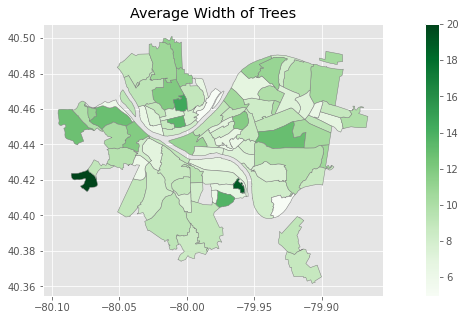

In [41]:
tree_map.plot(column='width',
               cmap='Greens',
               edgecolor="gray",
               legend=True,
               figsize=(15, 5),
               )
plt.title("Average Width of Trees")

When it comes to the width of trees, the outliers become East Carnegie and Arlington Heights.

I needed a way to combine these two metrics so I could come to a conclusive "best neighborhood to hide behind a tree from the police". But first I made a scatterplot to better visualize it:

Text(0, 0.5, 'Number of Trees')

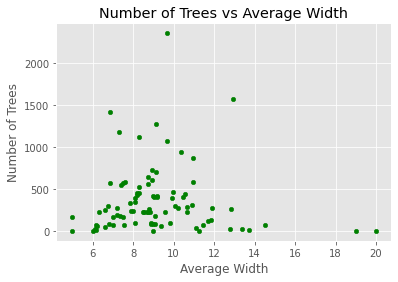

In [42]:
splot = tree_data.plot(kind="scatter", x = "width", y = "num", title = "Number of Trees vs Average Width", color = "green")
splot.set_xlabel("Average Width")
splot.set_ylabel("Number of Trees")

In order to find the conclusive best neighborhood based on this dataset I used z-scores, which ranks the neighborhoods based on how many standard deviations they are away from the mean. I did this for both the number of trees and the average width of the trees, and then added them together.

In [43]:
from scipy.stats import zscore
tree_zscores = tree_data.apply(zscore)
tree_zscores["total"] = tree_zscores["num"] + tree_zscores["width"]
tree_zscores.head(10)

,num,width,total
neighborhood,,,
Allegheny Center,-0.861624,1.681300,0.819676
Allegheny West,-0.329534,-0.166201,-0.495735
Allentown,-0.767426,0.083817,-0.683609
Arlington,-0.711417,-0.948308,-1.659725
Arlington Heights,-0.902358,3.934093,3.031735
Banksville,0.138908,-0.069106,0.069802
Bedford Dwellings,-0.484833,-0.863855,-1.348689
Beechview,0.408771,-0.353473,0.055299
Beltzhoover,-0.652862,-0.117682,-0.770544


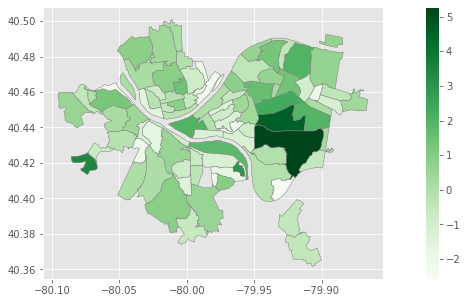

In [44]:
tree_zscore_map = neighborhoods.merge(tree_zscores, how = "left", left_on = "hood", right_on = "neighborhood")
tree_zscore_map.plot(column='total',
               cmap='Greens',
               edgecolor="gray",
               legend=True,
               figsize=(15, 5),
               )

Text(0.5, 0, 'Neighborhood')

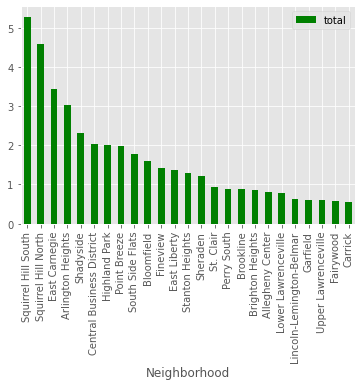

In [45]:
total_sorted = tree_zscores.sort_values(by = "total", ascending = False)
zscore_plot = total_sorted.head(25).plot(kind = "bar", y = "total", color = "green")
zscore_plot.set_xlabel("Neighborhood")

### Tree Dataset Conclusion
To conclude, the best neighborhoods based on the number of trees and the average width of those trees are Squirrel Hill South, Squirrel Hill North, and then East Carnegie.

# Final Conclusions

First of all, we needed to combine some of the metrics. Below is a bar graph of 10 neighborhoods that each have no recorded speed humps, sorted by the tree data z-scores. This makes it easier to visualize the neighborhoods in comparison to one another.

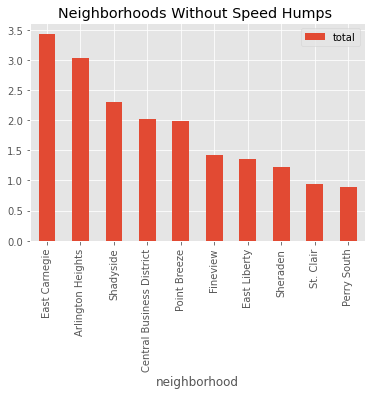

In [85]:
merged_metrics = tree_zscores.merge(hood, on = "neighborhood", how = "left")
merged_mask = merged_metrics["id"].isnull()
no_speed_humps = merged_metrics[merged_mask]
no_speed_humps.sort_values(by = "total", ascending = False).head(10).plot(kind = "bar", y = "total", title = "Neighborhoods Without Speed Humps ")

Additionally, we need to factor in which of these neighborhoods have low or declining violence scores. East Carnegie and Mount Oliver rank highly in those metrics.

## And the winner is...
### East Carnegie
Through our data analysis, and the bar graph above, we concluded that East Carnegie is the "best" neighborhood in Pittsburgh, when it comes to avoiding the law that is. East Carnegie is not recorded having any speed-humps, allowing the fugitive for a quick getaway. Also, East Carnegie was shown to have a low violence score when it comes to the police data, as well as a decreasing violence score over the years. This makes a good neighborhood for fugitives to hide in because with less violent crime in an area, there will be less of a steady police presence. Lastly, East Carnegie has a lot of trees, and was shown to have the highest average tree width. The thick trees makes it easy for the fugitive to avoid the eye of the police by simply standing behind the trunk and concealing their presence.

### Best vs Favorite Neighborhood Reflections


Paul:  I have only been in Pittsburgh for a little over a year and I have not yet seen enough of the city to declare a favorite neighborhood. For the sake of the reflection, I would say Oakland is my favorite neighborhood, simply because it is the only one I am remotely familiar with. I have never been to East Carnegie.

Jeff:  Like Paul, the best neighborhood differs from my personal favorite neighborhood simply because I haven't seen much of Pittsburgh. Having never been to East Carnegie or Mount Oliver, not much of a comparison can be made especially since Oakland is currently my favorite simply because it is where Pitt's campus resides. However, do I really want to visit a neighborhood where a fugitive could be lurking in?

Luke: I'm also only familiar with Oakland, having come to Pittsburgh just a few months ago. Therefore, it is hard to make a comparison our conclusion. If I ever need to escape the cops, though, I know exactly where to go.